### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [2]:
df = pd.read_csv("insurance_dataset_capstone.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


### Checking for null values and handling them (if any)

In [4]:
# Checking for missing values
df.isna().sum()

age         6
sex         1
bmi         1
children    1
smoker      1
region      1
charges     1
dtype: int64

Age had the most number of missing values (6), with the other columns having just one missing value. Since the missing values are not much, records with missing values will be dropped

In [5]:
# Dropping all records with missing values
df.dropna(inplace=True)

In [6]:
# Confirming if all missing vales have been removed
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Checking for duplicates and removing them (if any)

In [7]:
# Checking for duplicate records
df.duplicated().sum()

1

One duplicate record was found

In [8]:
# Removing the duplicate record
df.drop_duplicates(inplace = True)

In [9]:
# Confirming if the duplicate has been removed
df.duplicated().sum()

0

### Checking and Removing Outliers(if any)

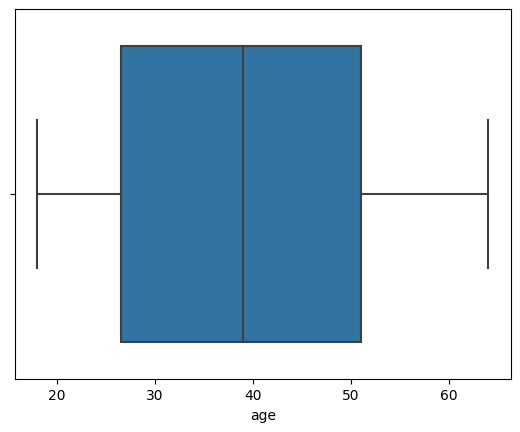

<Figure size 640x480 with 0 Axes>

In [10]:
# Checking for outliers
sns.boxplot(data=df, x= "age")
plt.show()
plt.clf()

There were no outliers for Age

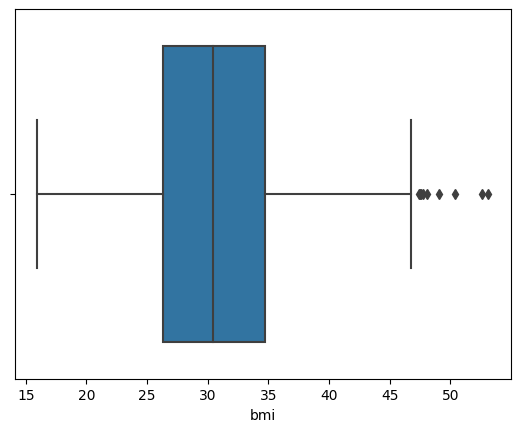

<Figure size 640x480 with 0 Axes>

In [11]:
# Checking for outliers
sns.boxplot(data=df, x= "bmi")
plt.show()
plt.clf()

Outliers were observed for BMI.

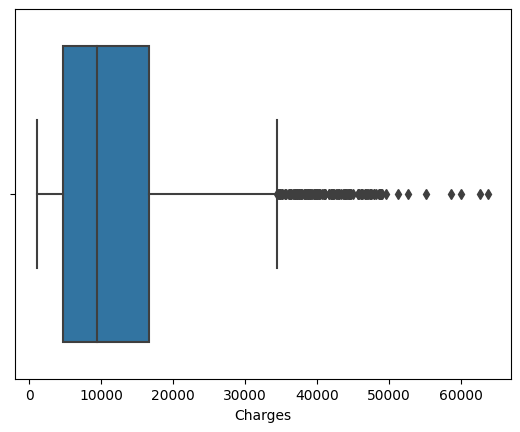

<Figure size 640x480 with 0 Axes>

In [12]:
# Checking for outliers
sns.boxplot(data=df, x= "charges")
plt.xlabel("Charges")
plt.show()
plt.clf()

Outliers were observed for Charges

In [13]:
"All outliers observed were on above the upper limit for outliers"

# Defining a function for calculating the upper limit for outliers
def outlier_upper_limit(asdf):
    q = list(asdf.quantile([0.25,0.75]))
    z = q[1] + 1.5 * (q[1]-q[0])
    return z


In [14]:
# Removing outliers of Charges
df2 = df[df["charges"] < outlier_upper_limit(df["charges"])]

# Removing outliers of BMI
df2 = df2[df2["bmi"] < outlier_upper_limit(df["bmi"])]

### Correlation between numerical variables shown by a heat map

<ipython-input-15-f3ead13cffb9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df2.corr(), annot=True,


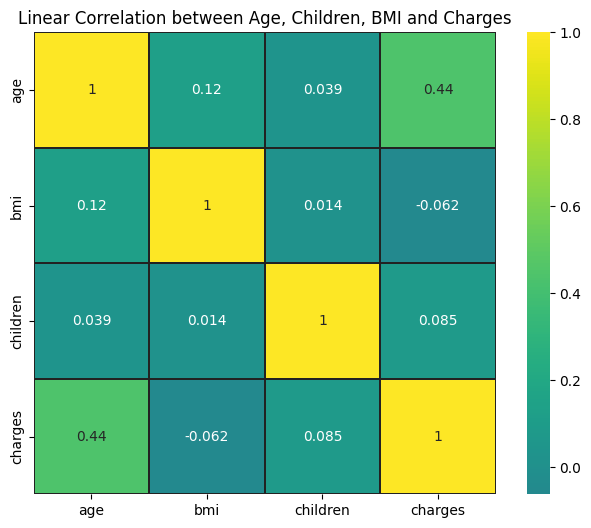

In [15]:
# Plotting the Correlation between numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(data=df2.corr(), annot=True,
                center=0,
                cmap='viridis',
                square = True,
                linewidth = 0.1,
                linecolor = "#222")
plt.title("Linear Correlation between Age, Children, BMI and Charges")
plt.show()

Only age has a strong positive correlation with Charges. Children and BMI have no linear relationship with neither Charges, Age nor with each other.

### Scatter plot showing the relationship between Age, Charges and Smoker

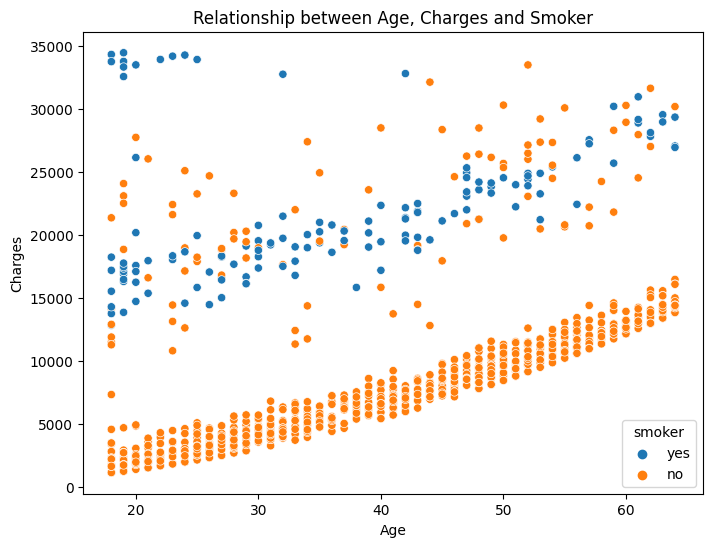

In [16]:
# PLOTTING THE RELATIONSHIP BETWEEN BMI, AGE AND SEX
plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=df2, x="age", y="charges", hue="smoker")
ax.set_title("Relationship between Age, Charges and Smoker")
ax.set_xlabel("Age")
ax.set_ylabel("Charges")
plt.show()

There is Positive correlation between Age and Charges. It can also be observed that non-smokers have lower charges, While smokers have a relatively higher Charges.

### Encoding categorical variables

In [17]:
# using cat.codes to encode the categorical variables
df2[["sex", "smoker", "region"]] = df2[["sex", "smoker", "region"]].astype("category")
df2["sex"] = df2["sex"].cat.codes
df2["smoker"] = df2["smoker"].cat.codes
df2["region"] = df2["region"].cat.codes

In [18]:
# Identifying the codes and their corresponding value
df5 = df.copy()
df5[["sex", "smoker", "region"]] = df5[["sex", "smoker", "region"]].astype('category')
SEX  = dict(enumerate(df5["sex"].cat.categories))
SMOKER = dict(enumerate(df5["smoker"].cat.categories))
REGION  = dict(enumerate(df5["region"].cat.categories))

In [19]:
SEX

{0: 'female', 1: 'male'}

In [20]:
SMOKER

{0: 'no', 1: 'yes'}

In [21]:
REGION

{0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}

## SECTION 5

### Feature Selection using ANOVA selection method

In [22]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520


In [30]:
# Subsetting the Target Variable
target_variable = df2["smoker"]

# Subsetting the other variables Bar Charges
predictor_variable= df2.drop(["smoker"], axis=1)

# Using ANOVA Method to select features
# Importing the libraries need for the feature selection
from sklearn.feature_selection import f_regression, SelectKBest

# Using SelectKBest to pick the best 4 features
ads = SelectKBest(score_func=f_regression, k=4)

# Determining the F1 Scores
asd_fit = ads.fit(predictor_variable,target_variable)

In [31]:
# Saving the F1 Scores in a DataFrame
features_score = pd.DataFrame(asd_fit.scores_)
features = pd.DataFrame(predictor_variable.columns)
Feature_score = pd.concat([features, features_score], axis=1)
Feature_score.columns = ["Features", "F_Score"]

In [32]:
Feature_score.sort_values(by="F_Score", ascending= False)

,Features,F_Score
5,charges,653.933074
2,bmi,85.483907
0,age,5.189198
4,region,2.443362
1,sex,0.154697
3,children,0.038591


The best 4 features are smoker, Age, region and Children. Hence BMI and Sex will be dropped.

In [33]:
final_data = df2.drop(["children", "sex"], axis=1)

In [34]:
final_data.head()

,age,bmi,smoker,region,charges
0,19.0,27.900,1,3,16884.92400
1,18.0,33.770,0,2,1725.55230
2,28.0,33.000,0,2,4449.46200
3,33.0,22.705,0,1,21984.47061
4,32.0,28.880,0,1,3866.85520


# PART 1

## CLASSIFICATION PROBLEM

In [35]:
target_variable = final_data.smoker.values
Predictor_variable = final_data.drop(["smoker"], axis=1)

### TASK 1

In [38]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Predictor_variable, target_variable, test_size=0.3, random_state=42)


### TASK 2

#### LOGISTIC REGRESSION

In [40]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)



Accuracy: 0.9157303370786517
Precision: 0.6346153846153846
Recall: 0.75
F1-Score: 0.6875
ROC AUC: 0.844551282051282


#### SVC MODEL

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create an SVC model
svc_model = SVC()

# Train the model on the training data
svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svc_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.8960674157303371
Precision: 0.5573770491803278
Recall: 0.7727272727272727
F1-Score: 0.6476190476190475
ROC AUC: 0.8430944055944055


#### DECISION TREE CLASSIFIER

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.949438202247191
Precision: 0.76
Recall: 0.8636363636363636
F1-Score: 0.8085106382978724
ROC AUC: 0.9125874125874126


#### KNeighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.898876404494382
Precision: 0.5740740740740741
Recall: 0.7045454545454546
F1-Score: 0.6326530612244898
ROC AUC: 0.815413752913753


#### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.9606741573033708
Precision: 0.7884615384615384
Recall: 0.9318181818181818
F1-Score: 0.8541666666666667
ROC AUC: 0.9482808857808858


Amongst the Five models, the model developed using the Random Forest classifier has the highest accuracy or performance for all the evaluation metrics

# PART 2

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

# Create an empty dataframe
results_df = pd.DataFrame(columns=['Model Name', 'Best Score (Accuracy)', 'Best Parameter'])

# Grid Search for Logistic Regression
logistic_model = LogisticRegression()
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_logistic_model = grid_search.best_estimator_
accuracy_lr = best_logistic_model.score(X_test, y_test)
results_df = results_df.append({'Model Name': 'Logistic Regression', 'Best Score (Accuracy)': accuracy_lr, 'Best Parameter': grid_search.best_params_}, ignore_index=True)

# Grid Search for SVC
svc_model = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svc_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_svc_model = grid_search.best_estimator_
accuracy_svc = best_svc_model.score(X_test, y_test)
results_df = results_df.append({'Model Name': 'SVC', 'Best Score (Accuracy)': accuracy_svc, 'Best Parameter': grid_search.best_params_}, ignore_index=True)

# Grid Search for Decision Tree
dt_classifier = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_dt_classifier = grid_search.best_estimator_
accuracy_dt = best_dt_classifier.score(X_test, y_test)
results_df = results_df.append({'Model Name': 'Decision Tree', 'Best Score (Accuracy)': accuracy_dt, 'Best Parameter': grid_search.best_params_}, ignore_index=True)

# Grid Search for k-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7]}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_knn_classifier = grid_search.best_estimator_
accuracy_knn = best_knn_classifier.score(X_test, y_test)
results_df = results_df.append({'Model Name': 'k-Nearest Neighbors', 'Best Score (Accuracy)': accuracy_knn, 'Best Parameter': grid_search.best_params_}, ignore_index=True)

# Grid Search for Random Forest
rf_classifier = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150]}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_
accuracy_rf = best_rf_classifier.score(X_test, y_test)
results_df = results_df.append({'Model Name': 'Random Forest', 'Best Score (Accuracy)': accuracy_rf, 'Best Parameter': grid_search.best_params_}, ignore_index=True)


In [47]:
results_df

,Model Name,Best Score (Accuracy),Best Parameter
0,Logistic Regression,0.943820,{'C': 0.1}
1,SVC,0.952247,"{'C': 0.1, 'kernel': 'linear'}"
2,Decision Tree,0.949438,{'max_depth': None}
3,k-Nearest Neighbors,0.898876,{'n_neighbors': 5}
4,Random Forest,0.966292,{'n_estimators': 100}


# TASK 3

From task 1, it was observed that the model developed using the random forest was the best. it had the best score for all the evaluation metrics. from task 2, it was observed that the best parameter for the Random forest (number of estimators) was 100 (selected from 50, 100 and 150).

Conclusively, Models developed using Random forest with the parameter n_estimators set to 100 is the best model for predicting is a client is a smoker or not.